#**Import Libraries and Packages**

In [235]:
!pip install category_encoders
%matplotlib inline
import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(
    { "figure.figsize": (4, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import PredictionErrorDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, ParameterGrid
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from sklearn.tree import export_text

#**Data/Domain Understanding and Exploration**
##**load and inspect dataset**

In [236]:
df_car=pd.read_csv("/content/drive/MyDrive/adverts.csv")
df_car

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


In [237]:
df_car.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [238]:
df_car.shape

(402005, 12)

In [239]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


###**Data Types**

In [240]:
# Checking data parsing by looking at the data types
data_types = df_car.dtypes
print(data_types)

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object


year of registraion has wrong dtype

###**identify quantitative and qualitative features**

In [241]:
#Identify numeric features
numeric_feat = df_car.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Features:", numeric_feat)

# Identify categorical features
categorical_feat = df_car.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_feat)

Numeric Features: Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')
Categorical Features: Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')


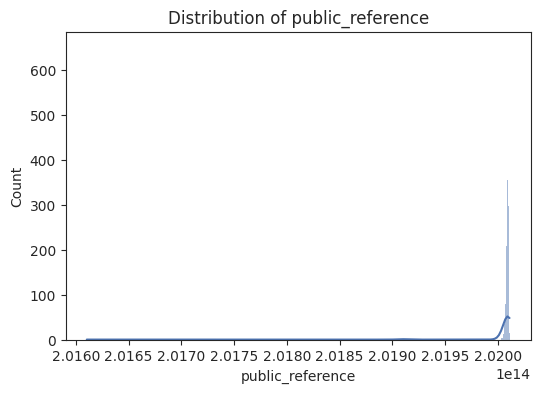

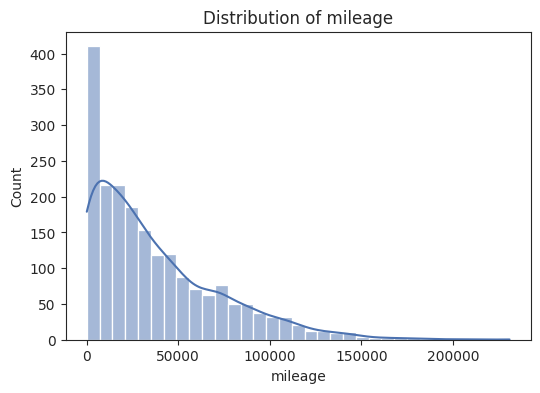

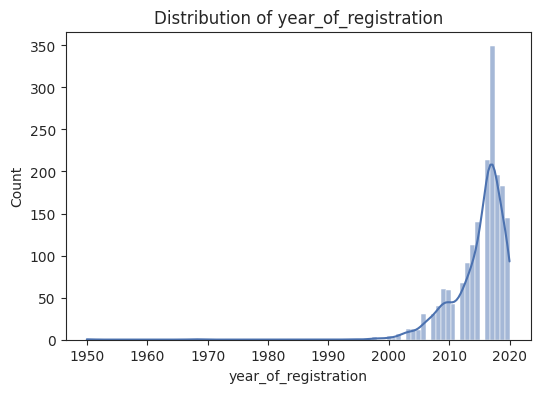

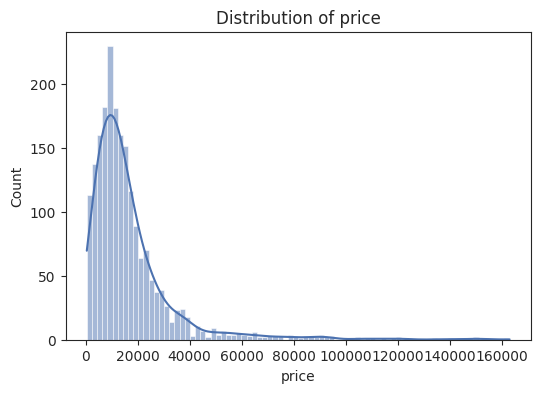

In [242]:
# Histograms for numeric features
subset_df_car = df_car.sample(2000)
for col in numeric_feat:
    plt.figure(figsize=(6, 4))
    sns.histplot(subset_df_car[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


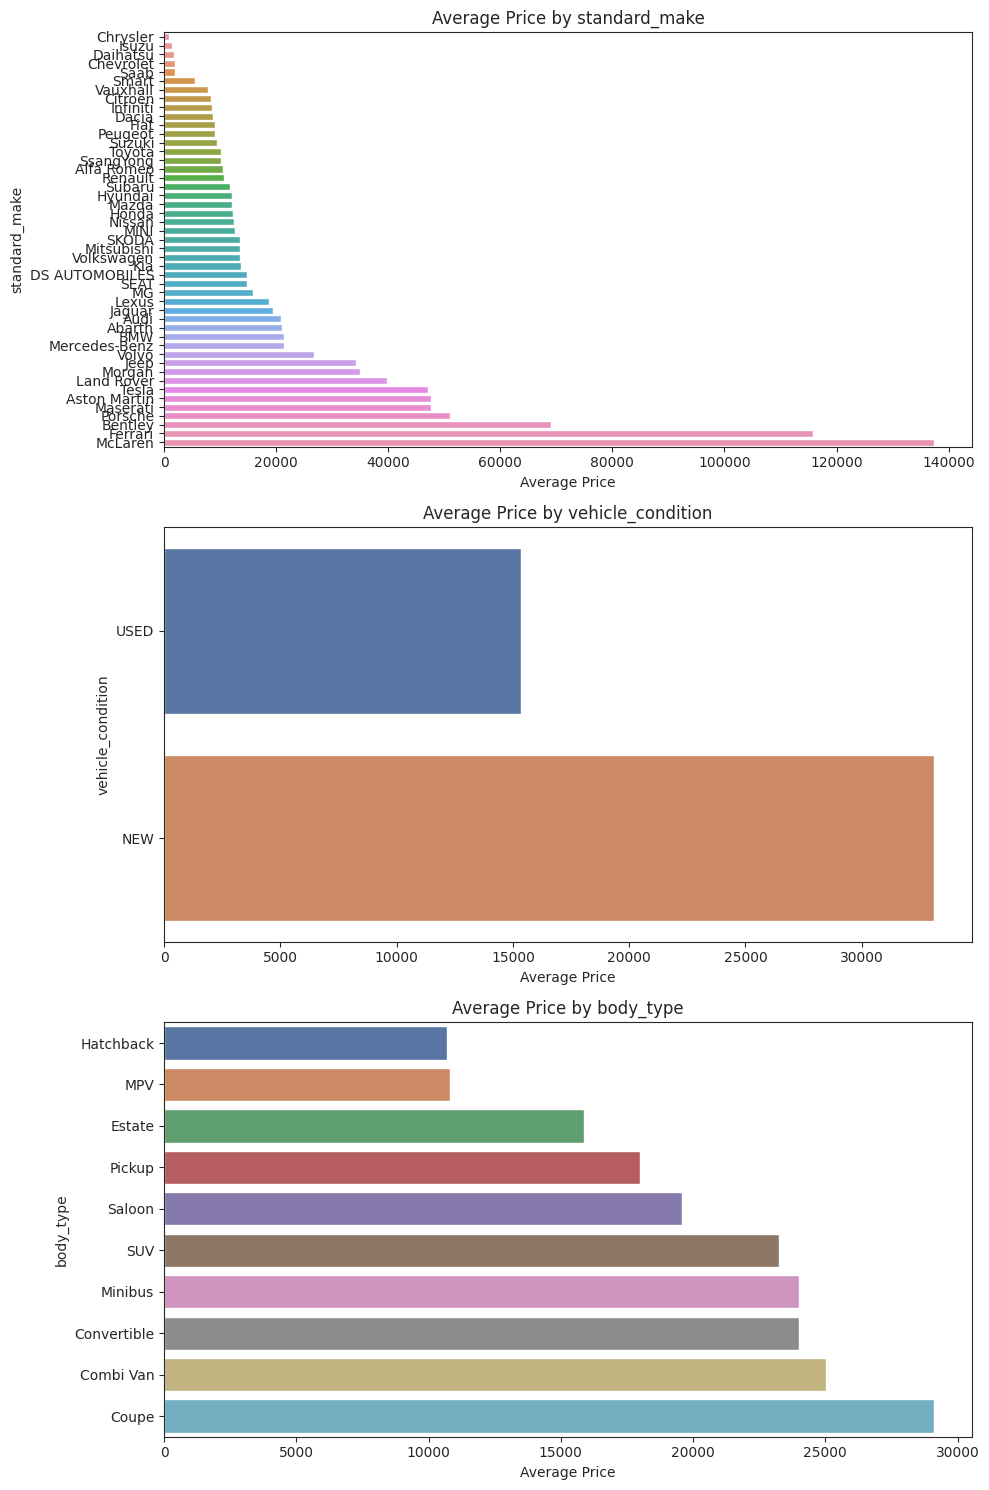

In [342]:
categorical_variables = ['standard_make', 'vehicle_condition', 'body_type']
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 15))

for i, col in enumerate(categorical_variables):
    # Calculating average price for each category of subset of dataset
    avg_price_per_category =subset_df_car.groupby(col)['price'].mean().sort_values()
    sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index, ax=axes[i])
    axes[i].set_title(f'Average Price by {col}')
    axes[i].set_xlabel('Average Price')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

##**Descriptive statistics**

In [244]:
# Descriptive statistics for numeric columns
numeric_descriptive_stats = df_car.describe().round(2)
print(numeric_descriptive_stats)

       public_reference    mileage  year_of_registration       price
count      4.020050e+05  401878.00             368694.00   402005.00
mean       2.020071e+14   37743.60               2015.01    17341.97
std        1.691662e+10   34831.72                  7.96    46437.46
min        2.013072e+14       0.00                999.00      120.00
25%        2.020090e+14   10481.00               2013.00     7495.00
50%        2.020093e+14   28629.50               2016.00    12600.00
75%        2.020102e+14   56875.75               2018.00    20000.00
max        2.020110e+14  999999.00               2020.00  9999999.00


In [245]:
df_car[['reg_code', 'crossover_car_and_van', 'public_reference']].describe(include='all')
df_car['crossover_car_and_van'].value_counts()


False    400210
True       1795
Name: crossover_car_and_van, dtype: int64

**identify good predictors**

In [246]:
correlation_matrix = df_car.corr()
print(correlation_matrix)


                       public_reference   mileage  year_of_registration  \
public_reference               1.000000  0.034941              0.021617   
mileage                        0.034941  1.000000             -0.375541   
year_of_registration           0.021617 -0.375541              1.000000   
price                         -0.052344 -0.160204              0.102341   
crossover_car_and_van         -0.026169  0.033543             -0.011155   

                          price  crossover_car_and_van  
public_reference      -0.052344              -0.026169  
mileage               -0.160204               0.033543  
year_of_registration   0.102341              -0.011155  
price                  1.000000               0.010402  
crossover_car_and_van  0.010402               1.000000  


<ipython-input-246-4e93bd055956>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_car.corr()


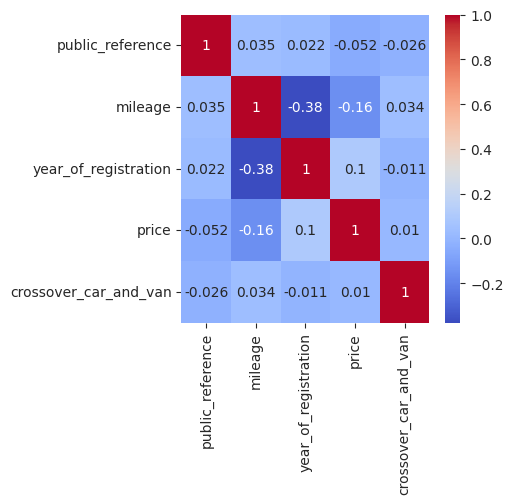

In [247]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

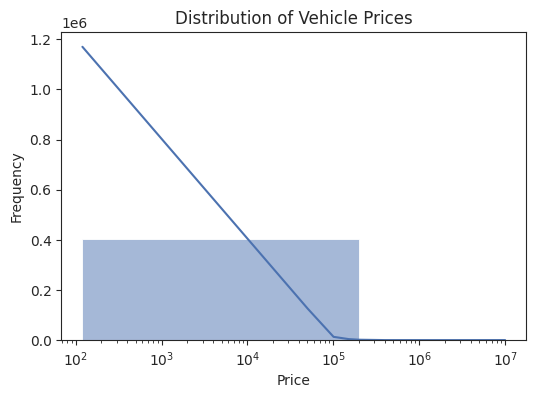

In [248]:

# Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(df_car['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xscale('log') # Using a log scale due to wide range of prices
plt.show()



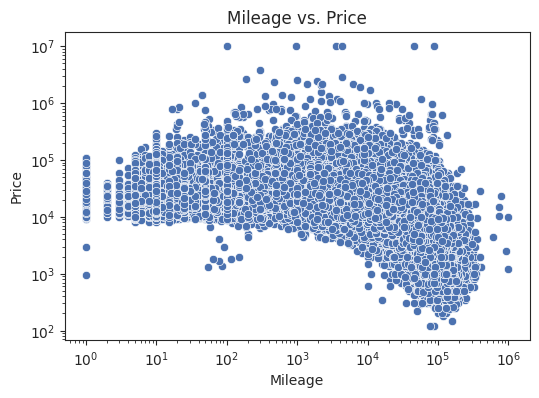

In [249]:
# Mileage vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='mileage', y='price', data=df_car)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.xscale('log')
plt.yscale('log')
plt.show()



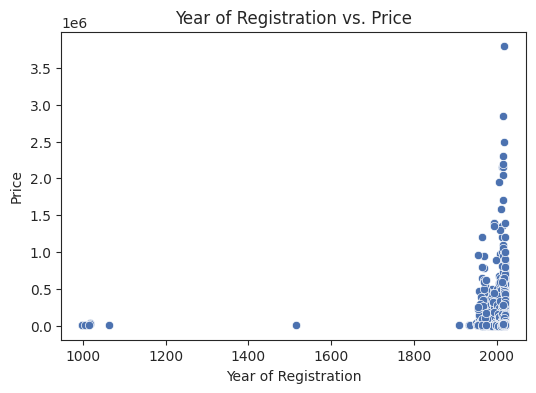

In [250]:
# Year of Registration vs. Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='year_of_registration', y='price', data=df_car)
plt.title('Year of Registration vs. Price')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.show()



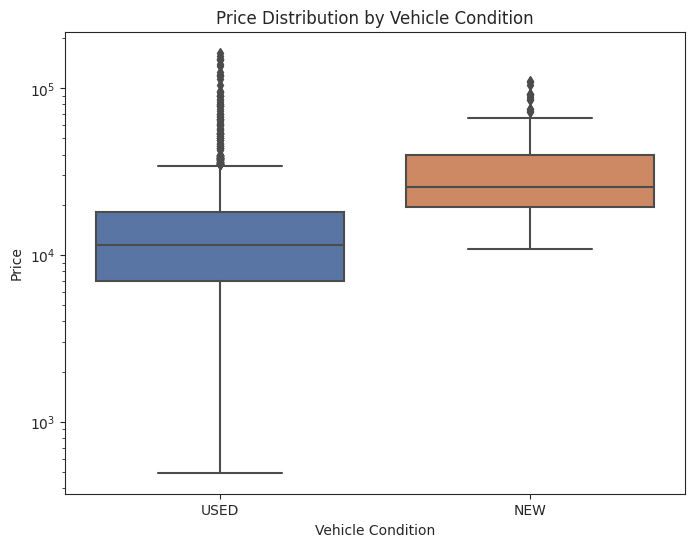

In [251]:
# Price Distribution by Vehicle Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='vehicle_condition', y='price', data=subset_df_car)
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

##**Data Cleaning**

In [252]:
df_car.nunique()

public_reference         402005
mileage                   80634
reg_code                     72
standard_colour              22
standard_make               110
standard_model             1168
vehicle_condition             2
year_of_registration         84
price                     30578
body_type                    16
crossover_car_and_van         2
fuel_type                     9
dtype: int64

In [253]:
df_car.count()

public_reference         402005
mileage                  401878
reg_code                 370148
standard_colour          396627
standard_make            402005
standard_model           402005
vehicle_condition        402005
year_of_registration     368694
price                    402005
body_type                401168
crossover_car_and_van    402005
fuel_type                401404
dtype: int64

##**Handle Missing Values**

In [254]:
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.width', None)  # Auto-detect the display width
#pd.set_option('display.max_colwidth', None)  # Show full content of each column

In [255]:
df_car.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

**Milage**

In [256]:
print(df_car['mileage'].value_counts())

0.0        16207
10.0       12873
5.0         2434
60000.0     1609
50000.0     1580
           ...  
53660.0        1
72993.0        1
74437.0        1
66881.0        1
53460.0        1
Name: mileage, Length: 80634, dtype: int64


In [257]:
df_car['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

In [258]:
median=df_car["mileage"].median()
df_car["mileage"]=df_car["mileage"].fillna(median)
df_car['mileage'].isnull().sum()

0

**standard_colour, body_type , fuel_type**


In [259]:
print(df_car[["standard_colour", "body_type", "fuel_type"]].value_counts())

standard_colour  body_type  fuel_type            
White            Hatchback  Petrol                   23214
Black            Hatchback  Petrol                   21514
Blue             Hatchback  Petrol                   18170
Red              Hatchback  Petrol                   18066
Grey             Hatchback  Petrol                   16338
                                                     ...  
Red              SUV        Bi Fuel                      1
Purple           SUV        Petrol Hybrid                1
Blue             Estate     Bi Fuel                      1
Multicolour      MPV        Diesel Hybrid                1
Red              MPV        Petrol Plug-in Hybrid        1
Length: 629, dtype: int64


In [260]:
df_car[["standard_colour", "body_type", "fuel_type"]].isnull().sum()

standard_colour    5378
body_type           837
fuel_type           601
dtype: int64

In [261]:
df_car["standard_colour"] =df_car["standard_colour"].fillna('White')
df_car[["body_type","fuel_type"]]=df_car[["body_type","fuel_type"]].fillna({'body_type': 'SUV', 'fuel_type': 'Diesel'})
df_car[["standard_colour","body_type","fuel_type"]].isnull().sum()

standard_colour    0
body_type          0
fuel_type          0
dtype: int64

In [262]:
df_car["year_of_registration"].isnull().sum()

33311

In [263]:
#Fill the NEW cars with 2021 by assuming that it is recent year
df_car.loc[df_car['vehicle_condition'] == 'NEW', 'year_of_registration'] = 2021
df_car["year_of_registration"].isnull().sum()

2062

In [264]:
#and rest are filled by 2016 as it is most frequent one
df_car["year_of_registration"]=df_car["year_of_registration"].fillna(2016).astype(int)
df_car["year_of_registration"].isnull().sum()

0

In [265]:
#remove Erroneous value
df_car = df_car[df_car['year_of_registration'] >= 1886]

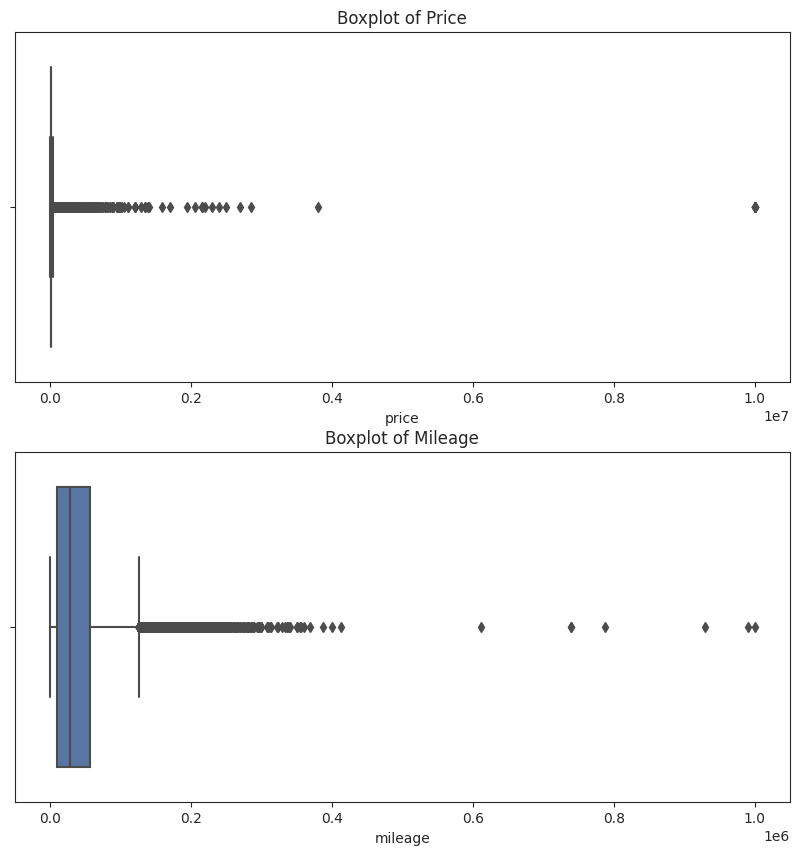

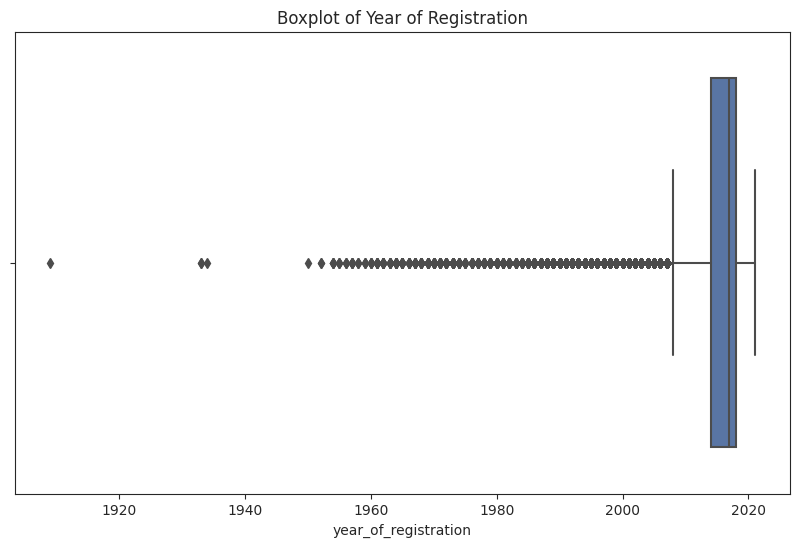

<Figure size 400x400 with 0 Axes>

In [266]:
# Detecting outliers in 'price' and 'mileage' using boxplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Boxplot for 'price'
sns.boxplot(x=df_car['price'], ax=axes[0])
axes[0].set_title('Boxplot of Price')

# Boxplot for 'mileage'
sns.boxplot(x=df_car['mileage'], ax=axes[1])
axes[1].set_title('Boxplot of Mileage')

# Boxplot for 'year_of_registration' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_car['year_of_registration'])
plt.title('Boxplot of Year of Registration')
plt.show()


plt.tight_layout()
plt.show()

In [267]:
# 1. Handle Outliers
upper_limit_mileage = df_car['mileage'].quantile(0.99)
df_car= df_car[df_car['mileage'] < upper_limit_mileage]
upper_limit_price = df_car['price'].quantile(0.99)
df_car = df_car[df_car['price'] < upper_limit_price]

In [268]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393860 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       393860 non-null  int64  
 1   mileage                393860 non-null  float64
 2   reg_code               362652 non-null  object 
 3   standard_colour        393860 non-null  object 
 4   standard_make          393860 non-null  object 
 5   standard_model         393860 non-null  object 
 6   vehicle_condition      393860 non-null  object 
 7   year_of_registration   393860 non-null  int64  
 8   price                  393860 non-null  int64  
 9   body_type              393860 non-null  object 
 10  crossover_car_and_van  393860 non-null  bool   
 11  fuel_type              393860 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 36.4+ MB


**reshape,**

In [269]:
correlation_matrix = df_car.corr()
print(correlation_matrix['price'])

public_reference        -0.065993
mileage                 -0.492918
year_of_registration     0.472881
price                    1.000000
crossover_car_and_van    0.041748
Name: price, dtype: float64


<ipython-input-269-c5055ecb82ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_car.corr()


<ipython-input-270-df3be53a1689>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_car.corr(), annot=True, fmt=".2f")


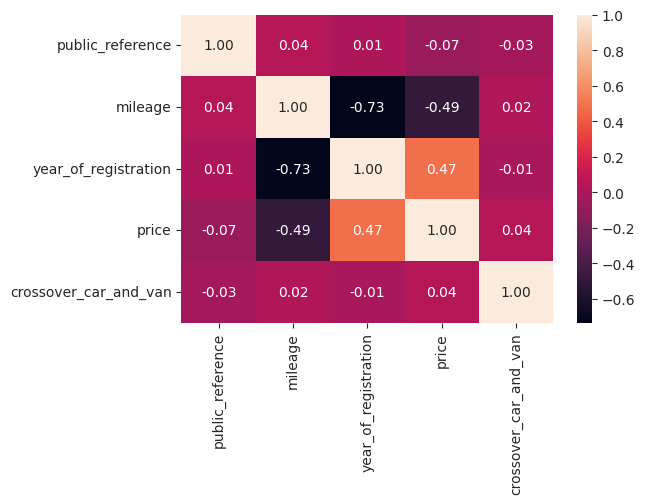

In [270]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_car.corr(), annot=True, fmt=".2f")
plt.show()

In [271]:
#drop columns
columns= ['public_reference', 'reg_code', 'crossover_car_and_van']
df_car.drop(columns=columns, inplace=True)

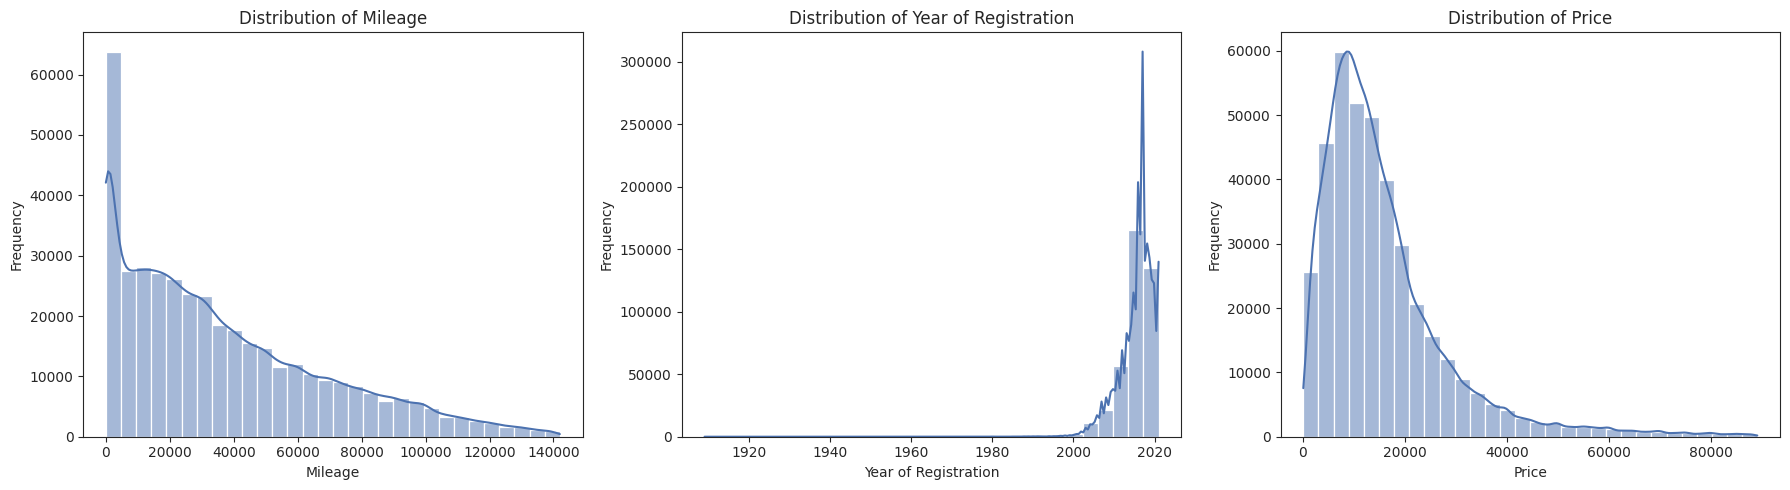

In [272]:
# Creating histograms for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting 'mileage'
sns.histplot(df_car['mileage'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Mileage')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Frequency')

# Plotting 'year_of_registration'
sns.histplot(df_car['year_of_registration'].dropna(), bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Year of Registration')
axes[1].set_xlabel('Year of Registration')
axes[1].set_ylabel('Frequency')

# Plotting 'price'
sns.histplot(df_car['price'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Price')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [273]:
new_order = ['mileage', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'year_of_registration', 'body_type', 'fuel_type', 'price']
df_car= df_car[new_order]

##**rename**

In [274]:
df_car = df_car.rename(columns={'standard_colour': 'colour','standard_make': 'make','standard_model': 'model','vehicle_condition':'condition','year_of_registration':'reg_year'})

In [275]:
df_car.to_csv('CleanedData.csv', index=False)

In [276]:
df = pd.read_csv('/content/CleanedData.csv')

In [277]:
df.head(5)

,mileage,colour,make,model,condition,reg_year,body_type,fuel_type,price
0,0.0,Grey,Volvo,XC90,NEW,2021,SUV,Petrol Plug-in Hybrid,73970
1,108230.0,Blue,Jaguar,XF,USED,2011,Saloon,Diesel,7000
2,7800.0,Grey,SKODA,Yeti,USED,2017,SUV,Petrol,14000
3,45000.0,Brown,Vauxhall,Mokka,USED,2016,Hatchback,Diesel,7995
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015,SUV,Diesel,26995


####**Select Categories for onehotencoding and target encoding**

In [278]:
cat_feat_hot= ['condition','fuel_type'] #for onehotencoding
cat_feat_target=  [ 'body_type','colour','make','model']  #for target

####**OnehotEncoding for low cardinality features**

In [279]:
# Apply one-hot encoding first
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[cat_feat_hot]).toarray()
encoded_columns = encoder.get_feature_names_out(cat_feat_hot)
df = pd.concat([df.drop(cat_feat_hot, axis=1), pd.DataFrame(df_encoded, columns=encoded_columns)], axis=1)
df.head(5)

,mileage,colour,make,model,reg_year,body_type,price,condition_NEW,condition_USED,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
0,0.0,Grey,Volvo,XC90,2021,SUV,73970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,108230.0,Blue,Jaguar,XF,2011,Saloon,7000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7800.0,Grey,SKODA,Yeti,2017,SUV,14000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,45000.0,Brown,Vauxhall,Mokka,2016,Hatchback,7995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64000.0,Grey,Land Rover,Range Rover Sport,2015,SUV,26995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Splitting**

In [280]:
target = 'price'
X = df.drop('price', axis=1)
y = df['price']
#splitting
X_train,X_temp,y_train,y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

####**Target Encoding after splitting**
**(to avoid leakage)**

In [281]:
#target-encoding
target_encoder = ce.TargetEncoder()
X_train[cat_feat_target] = target_encoder.fit_transform(X_train[cat_feat_target], y_train)
X_val[cat_feat_target] = target_encoder.transform(X_val[cat_feat_target])
X_test[cat_feat_target] = target_encoder.transform(X_test[cat_feat_target])

In [282]:
X_train.head(5)

,mileage,colour,make,model,reg_year,body_type,condition_NEW,condition_USED,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
287231,23000.0,15696.879893,8442.786976,5680.556164,2015,11157.328465,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93176,10.0,16221.458665,25986.738326,16414.022121,2021,18730.088305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206882,22458.0,17163.517589,9979.053959,12328.932546,2017,21772.110212,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
241773,37222.0,17163.517589,19803.857426,19107.805582,2014,18730.088305,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8671,50000.0,17163.517589,10867.077872,8189.577619,2009,16168.072613,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Scaling of numeric features**

In [283]:
# Rescale Numerical Columns
scaler = MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

In [284]:
X_train.head(2)

,mileage,colour,make,model,reg_year,body_type,condition_NEW,condition_USED,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
287231,0.161981,0.722902,0.080387,0.060601,0.946429,0.032274,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93176,0.000070,0.774402,0.344734,0.204708,1.000000,0.373389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [285]:
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)

#**Model Building**


**Cross validation on each model**

In [286]:
# Instantiate each of the models
linr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()

models = []
models.append(('LINR', LinearRegression()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))




In [287]:
# Set a seed
seed = 42

In [288]:
# Sampling from the training set
sample_size = int(0.3 * len(X_train))
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=seed)

In [289]:
from sklearn.model_selection import KFold, cross_val_score
np.random.seed(seed)

names = []
mse_means = []
mae_means = []
r2_means = []

for name, model in models:
    k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)


    mse_scores = -cross_val_score(model, X_train_sample, y_train_sample, cv=k_fold, scoring="neg_mean_squared_error")
    mae_scores = -cross_val_score(model, X_train_sample, y_train_sample, cv=k_fold, scoring="neg_mean_absolute_error")
    r2_scores = cross_val_score(model, X_train_sample, y_train_sample, cv=k_fold, scoring="r2")


    names.append(name)
    mse_means.append(mse_scores.mean())
    mae_means.append(mae_scores.mean())
    r2_means.append(r2_scores.mean())

    # Print results
    print(f"{name}:")
    print(f"  MSE: {mse_scores.mean().round(3)}" , f"  MAE: {mae_scores.mean().round(3)}",f"  R2: {r2_scores.mean().round(3)}")
    # print(f"  MAE: {mae_scores.mean().round(3)}")
    # print(f"  R2: {r2_scores.mean().round(3)}")
    print()

LINR:
  MSE: 33326066.779   MAE: 3750.516   R2: 0.793

KNR:
  MSE: 18431490.093   MAE: 2531.005   R2: 0.885

DTR:
  MSE: 17976491.782   MAE: 2363.474   R2: 0.89



In [290]:
# Print results
print(f"{name}:")
print(f"  MSE: {mse_scores.mean().round(3)}" , f"  MAE: {mae_scores.mean().round(3)}",f"  R2: {r2_scores.mean().round(3)}")

DTR:
  MSE: 17976491.782   MAE: 2363.474   R2: 0.89


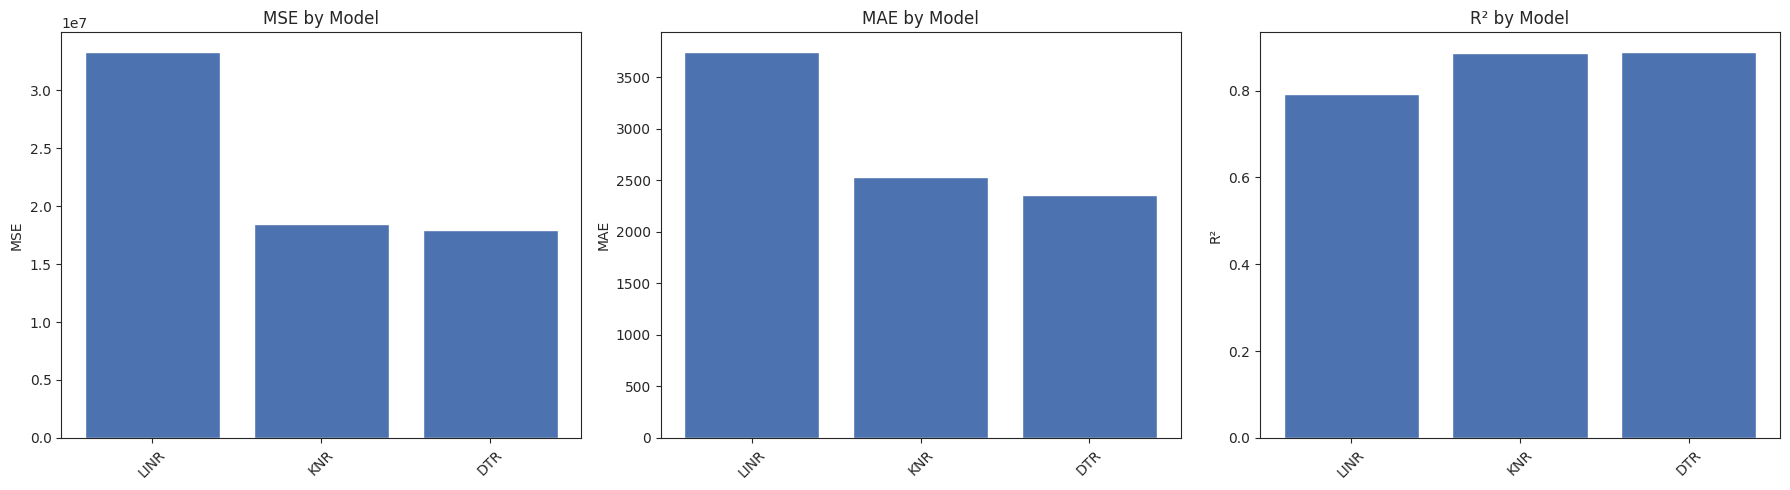

In [291]:


# Function to create bar plots
def create_bar_plot(metric_means, metric_name):
    plt.bar(names, metric_means)
    plt.xticks(rotation=45)
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Model')

# Create and show plots
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
create_bar_plot(mse_means, "MSE")

plt.subplot(1, 3, 2)
create_bar_plot(mae_means, "MAE")

plt.subplot(1, 3, 3)
create_bar_plot(r2_means, "R²")

plt.tight_layout()
plt.show()


##**DecisionTree**
**initialize and Train a Model**

In [292]:
DT_model = DecisionTreeRegressor(max_depth=3,random_state=seed)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [293]:
from sklearn.tree import export_text
print(
    export_text(DT_model, feature_names=X_train.columns.to_list())
)


|--- model <= 0.32
|   |--- reg_year <= 0.98
|   |   |--- model <= 0.17
|   |   |   |--- value: [7707.56]
|   |   |--- model >  0.17
|   |   |   |--- value: [14582.35]
|   |--- reg_year >  0.98
|   |   |--- model <= 0.17
|   |   |   |--- value: [16282.91]
|   |   |--- model >  0.17
|   |   |   |--- value: [26853.86]
|--- model >  0.32
|   |--- mileage <= 0.22
|   |   |--- model <= 0.49
|   |   |   |--- value: [36575.89]
|   |   |--- model >  0.49
|   |   |   |--- value: [56346.63]
|   |--- mileage >  0.22
|   |   |--- mileage <= 0.47
|   |   |   |--- value: [30247.33]
|   |   |--- mileage >  0.47
|   |   |   |--- value: [17111.04]



##**Tune Model using GridSearchCV and Model Ranking**


In [294]:
dt_params = {
    'max_depth': [3, 5, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

DT_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
Grid_result=DT_grid.fit(X_train, y_train)

In [295]:
Grid_df = pd.DataFrame(Grid_result.cv_results_)

In [296]:
Grid_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [297]:
Grid_df[[
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
    'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
44,20,4,10,-5.629120e+06,18833.011116,-1.081020e+07,91455.428825,1
42,20,4,2,-5.444207e+06,19464.064845,-1.093848e+07,73454.508399,2
43,20,4,5,-5.444208e+06,19464.427515,-1.094029e+07,61727.304318,3
41,20,2,10,-5.024811e+06,33069.089148,-1.106686e+07,63944.202326,4
38,20,1,10,-4.629033e+06,49587.854201,-1.136921e+07,185091.059523,5


In [298]:
# Select the best model
Grid_result.best_estimator_

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)

##**Evaluate on validation set**

In [299]:
best_DT=Grid_result.best_estimator_
y_pred_dt=best_DT.predict(X_val)
mae=mean_absolute_error(y_val, y_pred_dt)
R2=r2_score(y_val, y_pred_dt)
mse=mean_squared_error(y_val, y_pred_dt)




In [300]:
print("MSE for Decision Tree(val_set):", round(mse, 3))
print("MAE for Decision Tree(val_set):", round(mae, 3))
print("R2 for Decision Tree(val_set):", round(R2, 3))

MSE for Decision Tree(val_set): 10445780.771
MAE for Decision Tree(val_set): 1830.606
R2 for Decision Tree(val_set): 0.935


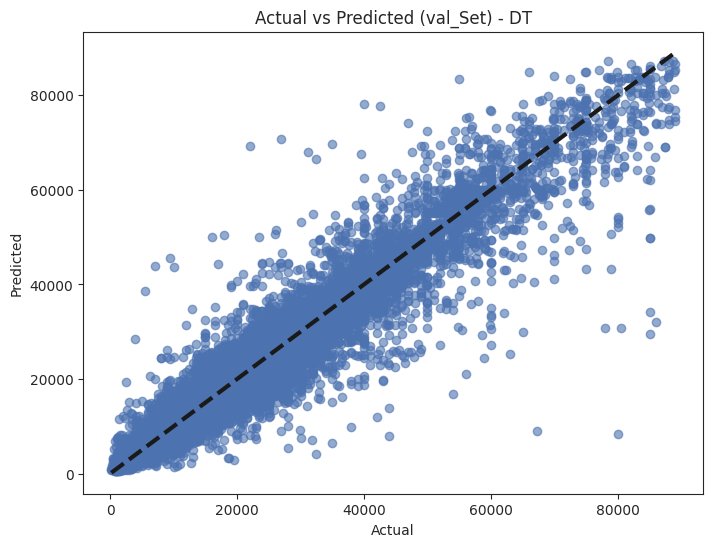

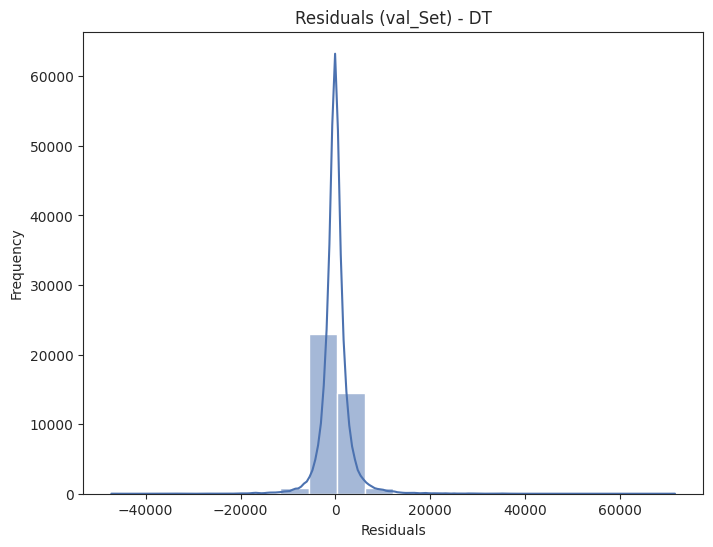

In [301]:
# Visualization of Actual vs Predicted Values and Residuals
def plot_predictions(y_val, y_pred_dt, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred_dt, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def plot_residuals(y_val, y_pred_dt, title):
   plt.figure(figsize=(8, 6))
   residuals = y_val - y_pred_dt
   sns.histplot(residuals,bins=20, kde=True)
   plt.title(title)
   plt.xlabel('Residuals')
   plt.ylabel('Frequency')
   plt.show()

plot_predictions(y_val, y_pred_dt, 'Actual vs Predicted (val_Set) - DT')
plot_residuals(y_val, y_pred_dt, 'Residuals (val_Set) - DT')

In [302]:
#comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred_dt
})

# Display a sample
actual_vs_predicted.sample(10)

,Actual,Predicted
278726,5795,6417.857143
369071,12495,14947.916667
84974,31999,35446.666667
260530,13995,14446.200000
293123,10495,10193.200000
240925,31344,32193.750000
175930,2595,1671.875000
88925,26000,22802.610169
256700,19980,25221.106870
175044,22480,21543.000000


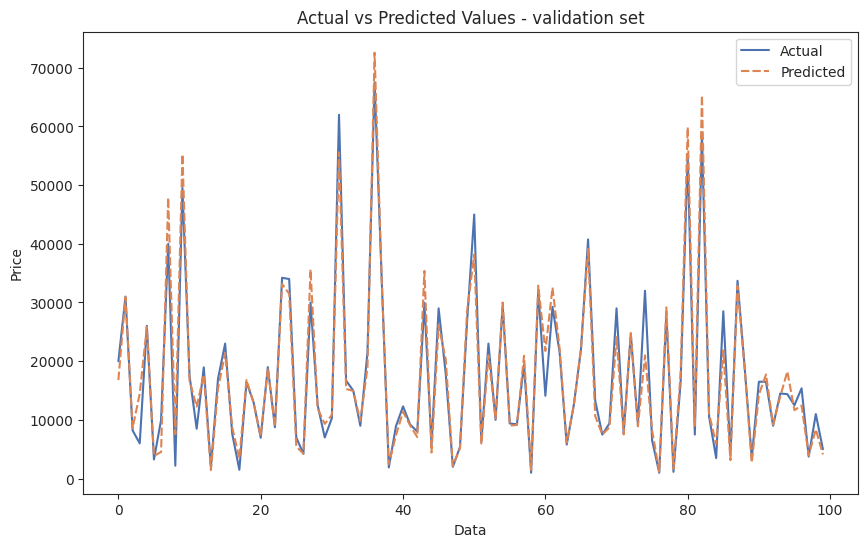

In [303]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=actual_vs_predicted.sample(100).reset_index(drop=True))  # I use Sample 100 for better visibility
plt.title('Actual vs Predicted Values - validation set')
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()

##**Evaluate Model on TEST set**

In [304]:
best_DT=Grid_result.best_estimator_
#now Use the best model to make predictions on the test set
y_pred_DT = best_DT.predict(X_test)

#Evaluate the performance
mae_dt=mean_absolute_error(y_test, y_pred_DT)
R2_dt=r2_score(y_test, y_pred_DT)
mse_dt=mean_squared_error(y_test, y_pred_DT)
print("MSE for Decision Tree(test_set):",round(mse_dt, 3))
print("MAE for Decision Tree(test_set):",round(mae_dt, 3))
print("R2 for Decision Tree(test_set):",round(R2_dt, 3))



MSE for Decision Tree(test_set): 10983845.244
MAE for Decision Tree(test_set): 1840.054
R2 for Decision Tree(test_set): 0.933


In [305]:
cv_scores_dt = cross_val_score(best_DT, X_train, y_train)
cv_scores_dt

array([0.931732  , 0.9345827 , 0.9333449 , 0.93322704, 0.93372351])

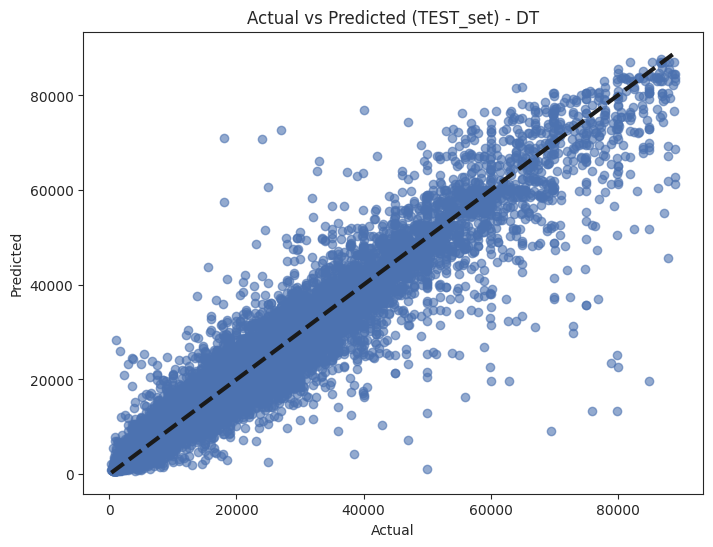

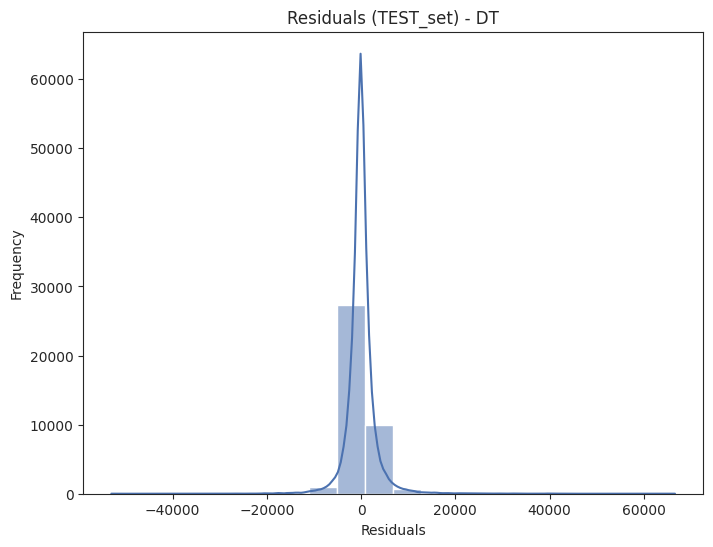

In [306]:
# Visualization of Actual vs Predicted Values and Residuals
def plot_predictions(y_test, y_pred_DT, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred_DT, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def plot_residuals(y_test, y_pred_DT, title):
    residuals = y_test- y_pred_DT
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals,bins=20, kde=True)
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

plot_predictions(y_test, y_pred_DT, 'Actual vs Predicted (TEST_set) - DT')
plot_residuals(y_test, y_pred_DT, 'Residuals (TEST_set) - DT')

In [307]:
# comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_DT

})

# Display a sample
actual_vs_predicted.sample(10)

,Actual,Predicted
51456,19900,16952.400000
375895,9058,9912.777778
349865,16199,18979.666667
120605,1450,1562.333333
120099,26780,28630.444444
317443,65352,56582.444444
333160,5995,6311.222222
318630,11000,11782.128571
370468,16495,17673.111111
23537,14990,14925.666667


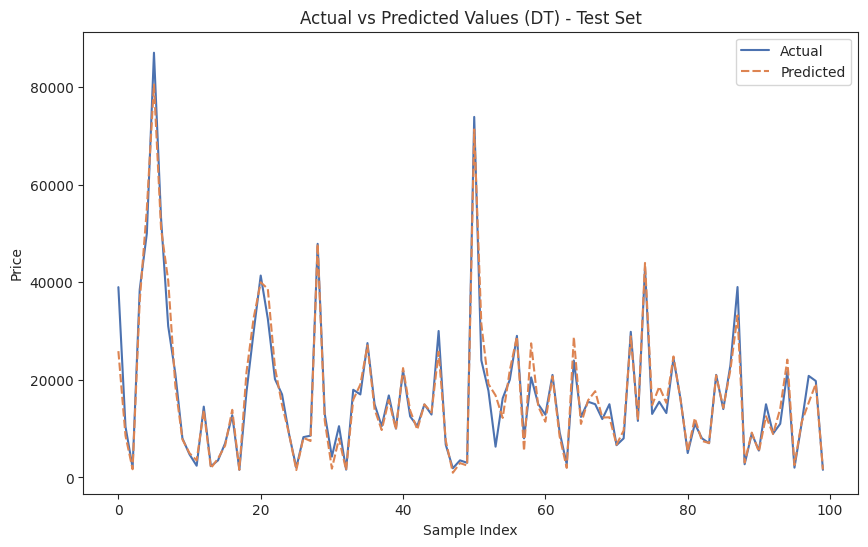

In [308]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=actual_vs_predicted.sample(100).reset_index(drop=True))
plt.title('Actual vs Predicted Values (DT) - Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()

##**Feature Importance**

In [309]:
#feature importance from the Decision Tree
importances = best_DT.feature_importances_
features = X_train.columns
for feature_name, imp in zip(features, importances):
    print(f"{feature_name}: {imp.round(4)}")



mileage: 0.1079
colour: 0.0037
make: 0.0497
model: 0.5995
reg_year: 0.2114
body_type: 0.0107
condition_NEW: 0.0008
condition_USED: 0.0021
fuel_type_Bi Fuel: 0.0
fuel_type_Diesel: 0.0049
fuel_type_Diesel Hybrid: 0.0002
fuel_type_Diesel Plug-in Hybrid: 0.0
fuel_type_Electric: 0.0013
fuel_type_Petrol: 0.0046
fuel_type_Petrol Hybrid: 0.0006
fuel_type_Petrol Plug-in Hybrid: 0.0025


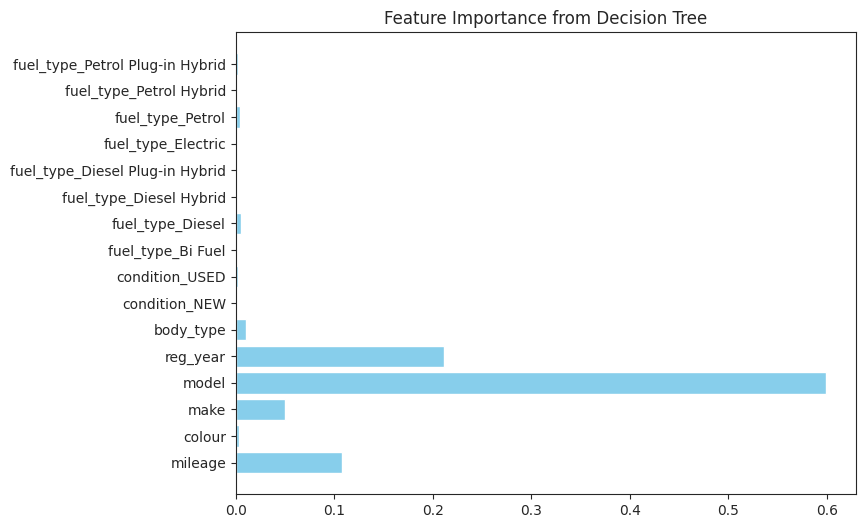

In [310]:
# Plotting
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance from Decision Tree')
plt.show()

#**KNeighborsRegressor**
I used sample data to train knn otherwise it takes too much time.

In [311]:
# Sampling from the training set
sample_size = int(0.3 * len(X_train))
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=seed)

# Train the kNN model
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train_sample, y_train_sample)

KNeighborsRegressor(n_neighbors=15)

tried this model using different ranges 1-15, 1-20 but finally fixed that as it is now to reduced its execution time.

In [312]:
# Hyperparameter tuning (Grid Search)
param_grid = {'n_neighbors': [3,5,7,10,15]}
knn_Grid= GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
knn_result=knn_Grid.fit(X_train_sample, y_train_sample)
knn_df=pd.DataFrame(knn_result.cv_results_)

In [313]:
knn_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [314]:
knn_df[[
    'param_n_neighbors', 'mean_train_score', 'std_train_score',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score').head()

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
1,5,-1.183950e+07,132394.135241,-1.842797e+07,653124.333719,1
2,7,-1.370514e+07,128078.538986,-1.872620e+07,631770.866526,2
0,3,-8.856514e+06,116884.181421,-1.881636e+07,599941.722905,3
3,10,-1.547107e+07,120297.480604,-1.922581e+07,547453.033545,4
4,15,-1.725814e+07,103229.821654,-1.996498e+07,523678.050231,5


In [315]:
knn_result.best_params_

{'n_neighbors': 5}

In [316]:
knn_result.best_estimator_

KNeighborsRegressor()

In [317]:
# Select the best model
best_knn = knn_result.best_estimator_

##**validate model**

In [318]:
knn_pred= best_knn.predict(X_val)
mae=mean_absolute_error(y_val,knn_pred)
R2=r2_score(y_val,knn_pred)
mse=mean_squared_error(y_val, knn_pred)
print("MSE for KNN(val_set):",mse)
print("MAE for KNN(val_set):",mae)
print("R2 for KNN(val_set):",R2)

MSE for KNN(val_set): 18296727.23120398
MAE for KNN(val_set): 2469.168836642462
R2 for KNN(val_set): 0.8868374726966302


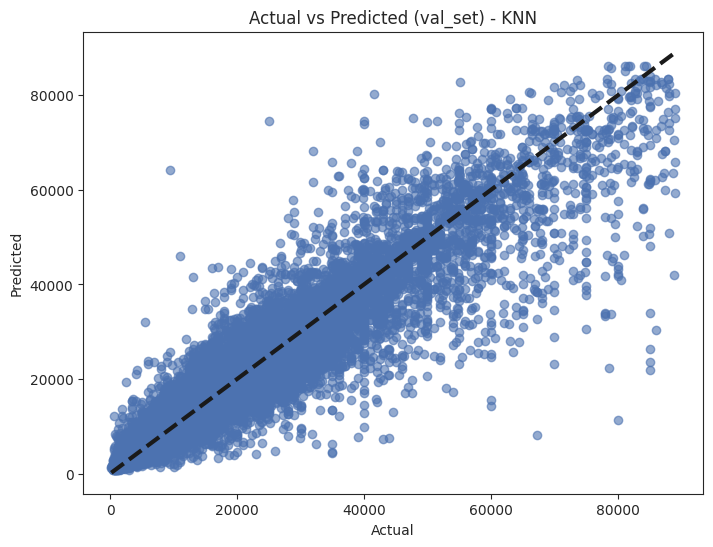

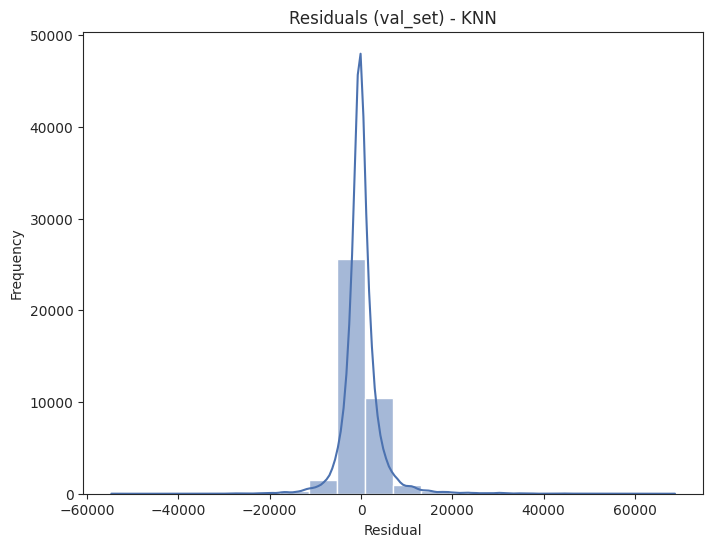

In [319]:
# Visualization of Actual vs Predicted Values and Residuals
def plot_predictions(y_val,knn_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, knn_pred, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def plot_residuals(y_val, knn_pred, title):
    residuals = y_val - knn_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals,bins=20, kde=True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()
    # sns.histplot(residuals,bins=20, kde=True)
    # plt.title(title)
    # plt.xlabel('Residuals')
    # plt.show()

plot_predictions(y_val, knn_pred, 'Actual vs Predicted (val_set) - KNN')
plot_residuals(y_val, knn_pred, 'Residuals (val_set) - KNN')

##**here evaluate on test**

In [320]:
knn_Pred= best_knn.predict(X_test)
mae_knn=mean_absolute_error(y_test,knn_Pred)
R2_knn=r2_score(y_test,knn_Pred)
mse_knn=mean_squared_error(y_test, knn_Pred)
print("MSE for KNN(test_set):",mse_knn)
print("MAE for KNN(test_set):",mae_knn)
print("R2 for KNN(test_set):",R2_knn)



MSE for KNN(test_set): 18230191.431965675
MAE for KNN(test_set): 2470.0488346112834
R2 for KNN(test_set): 0.8879923790125539


In [321]:
# Perform cross-validation on training set using the best model
cv_scores_knn = cross_val_score(best_knn, X_train, y_train)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_knn)
print(f"Mean CV Score: {cv_scores_knn.mean():.4f}")

Cross-Validation Scores: [0.91172569 0.91195298 0.91174361 0.90971267 0.91053623]
Mean CV Score: 0.9111


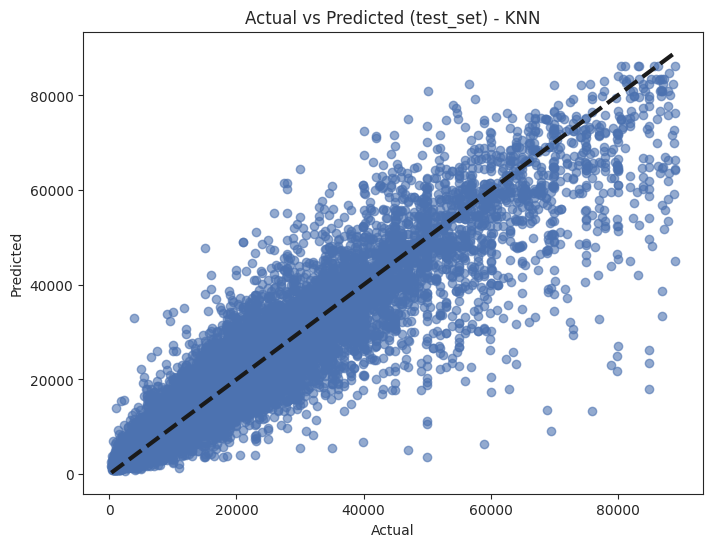

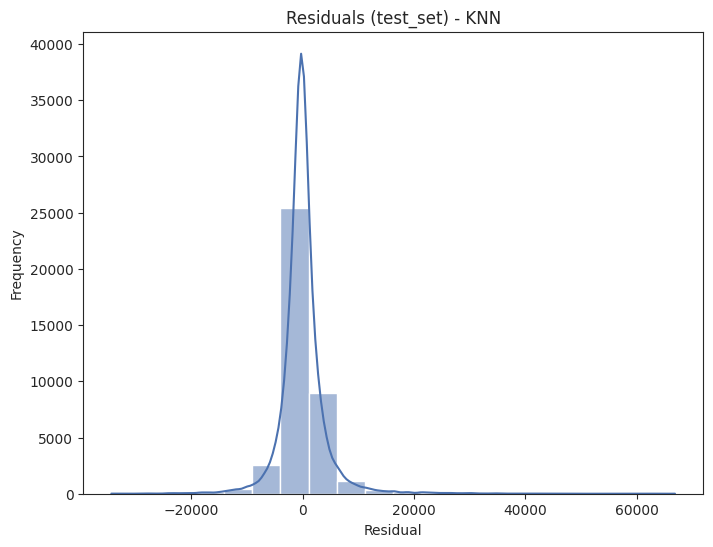

In [322]:
# Visualization of Actual vs Predicted Values and Residuals
def plot_predictions(y_test,knn_Pred, title):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, knn_Pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

def plot_residuals(y_val, knn_pred, title):
    residuals = y_test - knn_Pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals,bins=20, kde=True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()


plot_predictions(y_test, knn_Pred, 'Actual vs Predicted (test_set) - KNN')
plot_residuals(y_test, knn_Pred, 'Residuals (test_set) - KNN')

In [323]:
# Obtain the score
train_score = knn_model.score(X_train_sample, y_train_sample)
test_score = knn_model.score(X_test, y_test)

print('Training Score: %.3f' % train_score)
print('Test Score: %.3f' % test_score)

Training Score: 0.897
Test Score: 0.879


In [324]:
# comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': knn_Pred

})

# Display a sample
actual_vs_predicted.sample(10)

,Actual,Predicted
146073,14995,16601.8
160184,13499,11193.0
364216,9295,8728.0
350107,16999,17005.8
79561,15998,16124.6
330397,7940,7311.8
325595,18300,11640.4
100681,3795,4451.4
252349,8995,9015.0
80269,9990,12345.0


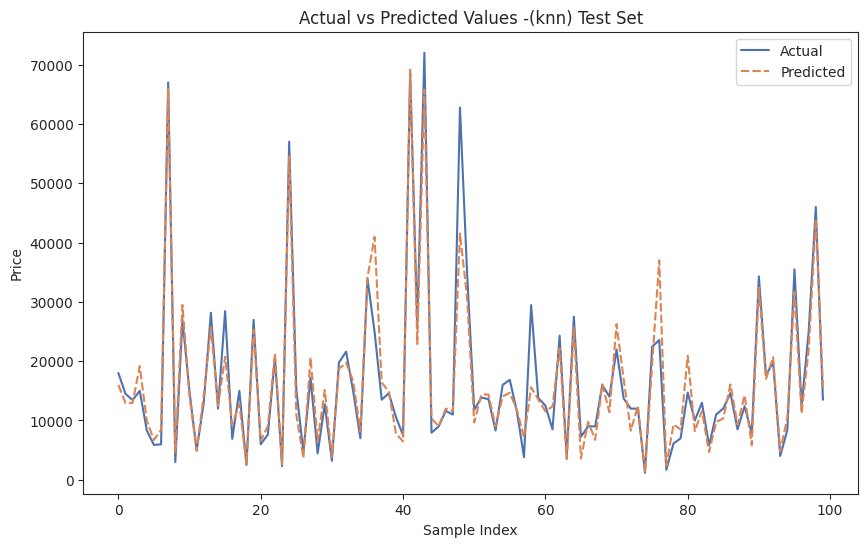

In [325]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=actual_vs_predicted.sample(100).reset_index(drop=True))
plt.title('Actual vs Predicted Values -(knn) Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()

##**Linear Regression**

In [326]:
#Instantiate the Linear Regression model
linear_model = LinearRegression()
# Train the model on the training set
linear_model.fit(X_train, y_train)



LinearRegression()

**validat**

In [327]:
# Validate the model
y_val_pred = linear_model.predict(X_val)
mae=mean_absolute_error(y_val, y_val_pred)
R2=r2_score(y_val, y_val_pred)
mse_LR=mean_squared_error(y_val, y_val_pred)
print("MSE for LR(Val_set):",mse)
print("MAE for LR(VAL_set):",mae)
print("R2 for LR(VAL_set):",R2)

MSE for LR(Val_set): 18296727.23120398
MAE for LR(VAL_set): 3803.526320908129
R2 for LR(VAL_set): 0.7892767973562145


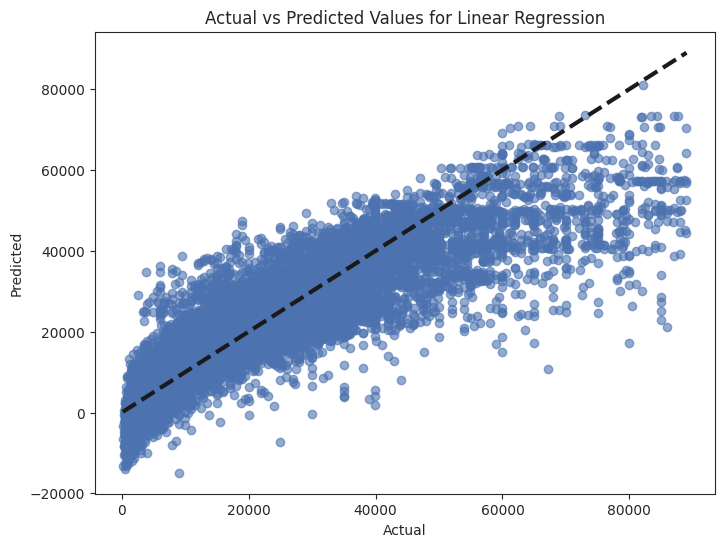

In [328]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha= 0.6)

plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()


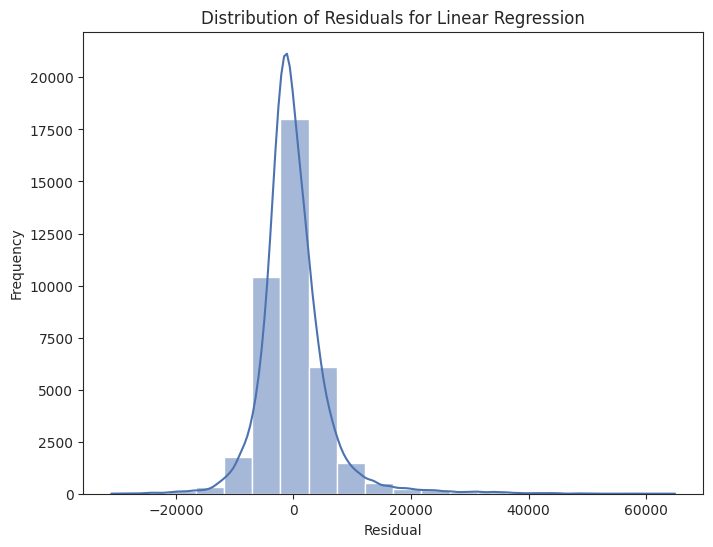

In [329]:
# Residuals plot for Linear Regression
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals,bins=20, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Linear Regression')
plt.show()


###**evaluate on TEst**

In [330]:
# test the model
y_LR_pred = linear_model.predict(X_test)
mae_LR=mean_absolute_error(y_test, y_LR_pred)
R2_LR=r2_score(y_test, y_LR_pred)
mse_LR=mean_squared_error(y_test, y_LR_pred)
print("MSE for LR(test_set):",mse_LR)
print("MAE for LR(test_set):",mae_LR)
print("R2 for LR(test_set):",R2_LR)

MSE for LR(test_set): 34320268.48115836
MAE for LR(test_set): 3790.1502877712487
R2 for LR(test_set): 0.7891337763198416


In [331]:
# Perform cross-validation on the entire training set using the best model
cv_scores_lin = cross_val_score(linear_model, X_train, y_train)
cv_scores_lin

array([0.79213345, 0.79178894, 0.79146461, 0.79322357, 0.79099622])

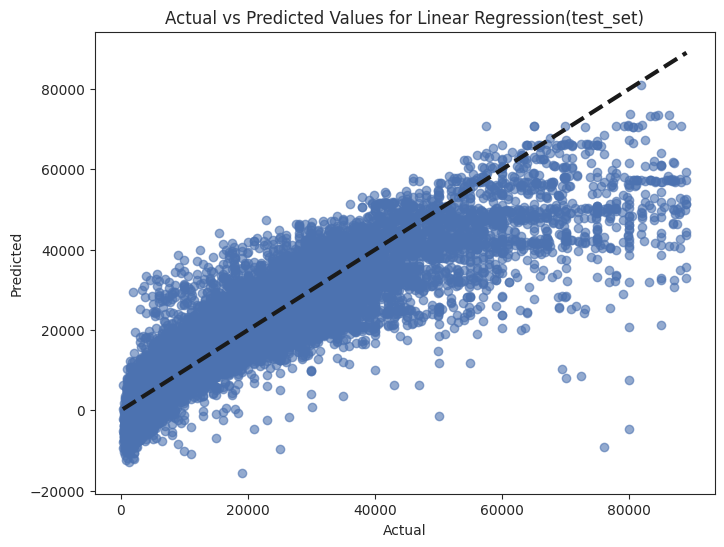

In [332]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_LR_pred,alpha =0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Linear Regression(test_set)')
plt.show()

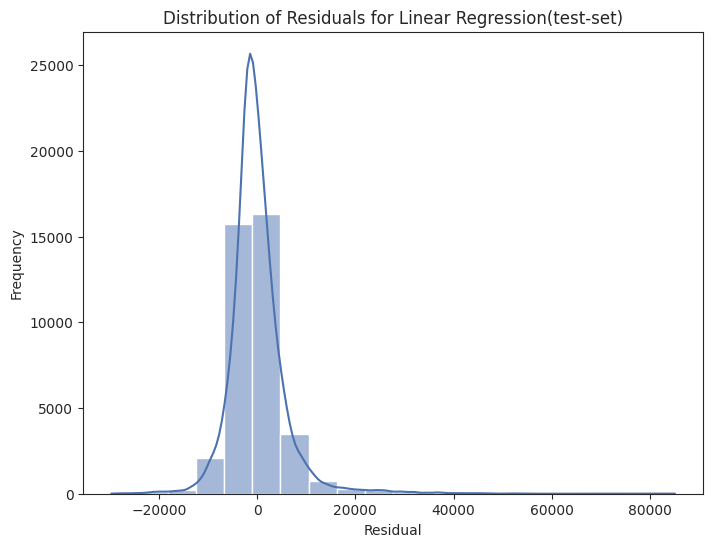

In [333]:
# Residuals plot for Linear Regression
residuals = y_test - y_LR_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals,bins=20, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Linear Regression(test-set)')
plt.show()

In [334]:
# comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted':linear_model.predict(X_test)
})

actual_vs_predicted.sample(10)


,Actual,Predicted
247800,11450,11396.197410
306198,14000,15772.632694
336746,17000,17476.716266
153381,4999,5822.583474
45404,11822,10953.511348
201847,5999,7908.463841
47126,25495,21060.026024
31200,13500,9731.976359
90593,9980,9454.565733
203250,20656,19087.103418


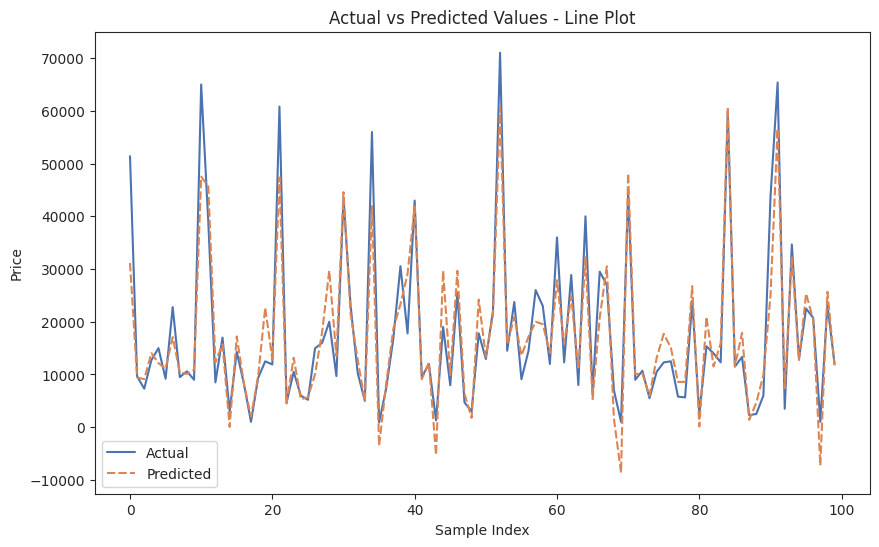

In [335]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=actual_vs_predicted.sample(100).reset_index(drop=True))  # Sample 100 for better visibility
plt.title('Actual vs Predicted Values - Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()

In [336]:
# Get the coefficients
coefficients = linear_model.coef_
features = X_train.columns

for feature_name, coef in zip(features, coefficients):
    print(f"Coef for {feature_name}: {coef.round(3)}")

Coef for mileage: -15974.626
Coef for colour: 942.151
Coef for make: 19489.515
Coef for model: 55350.62
Coef for reg_year: 38609.965
Coef for body_type: 654.201
Coef for condition_NEW: 3170.505
Coef for condition_USED: -3170.505
Coef for fuel_type_Bi Fuel: -8306.11
Coef for fuel_type_Diesel: -2618.313
Coef for fuel_type_Diesel Hybrid: 5075.946
Coef for fuel_type_Diesel Plug-in Hybrid: 7028.039
Coef for fuel_type_Electric: -1683.642
Coef for fuel_type_Petrol: -2443.894
Coef for fuel_type_Petrol Hybrid: -1428.7
Coef for fuel_type_Petrol Plug-in Hybrid: 4376.674


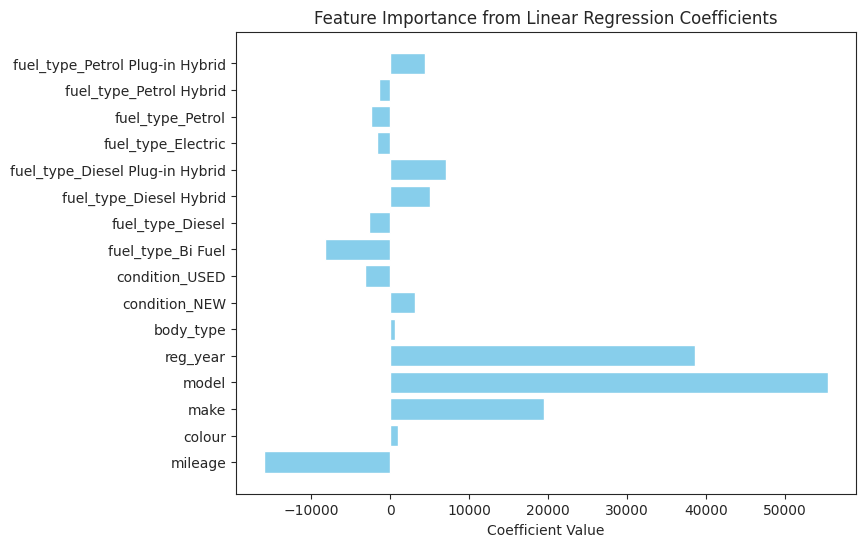

In [337]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression Coefficients')
plt.show()

##**Evaluation of Different Models**

In [338]:

model_scores = {
    'Model': ['LR','DT', 'KNN'],
    'R2_Score': [R2_LR,R2_dt, R2_knn],
    'Mean Training Score': [cv_scores_lin.mean(), cv_scores_dt.mean(), cv_scores_knn.mean()],
    'Score Difference': [cv_scores_lin.mean() - R2_LR,
                         cv_scores_dt.mean() - R2_dt,
                         cv_scores_knn.mean() -R2_knn,
                        ]
}


scores_df = pd.DataFrame(model_scores)
print(scores_df)

  Model  R2_Score  Mean Training Score  Score Difference
0    LR  0.789134             0.791921          0.002788
1    DT  0.932514             0.933322          0.000808
2   KNN  0.887992             0.911134          0.023142


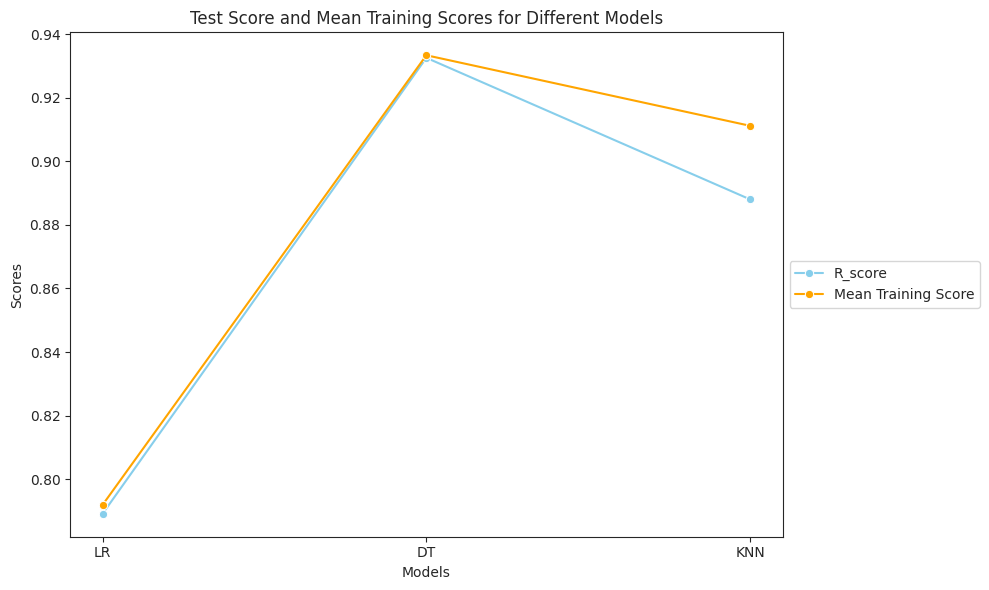

In [339]:
# Line plot for test accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(x=scores_df['Model'], y=scores_df['R2_Score'],
             color='skyblue', label='R_score', marker='o')

# Line plot for mean CV scores
sns.lineplot(x=scores_df['Model'], y=scores_df['Mean Training Score'],
             color='orange', label='Mean Training Score', marker='o')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Test Score and Mean Training Scores for Different Models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot area

# Show plot
plt.tight_layout()
plt.show()

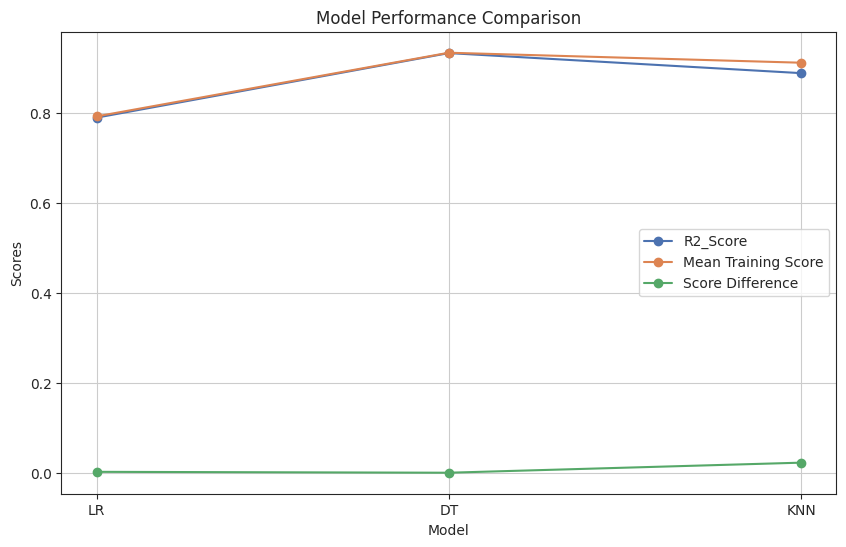

In [340]:
# Plotting
plt.figure(figsize=(10, 6))
for column in scores_df.columns[1:]:
    plt.plot(scores_df['Model'], scores_df[column], marker='o', label=column)

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

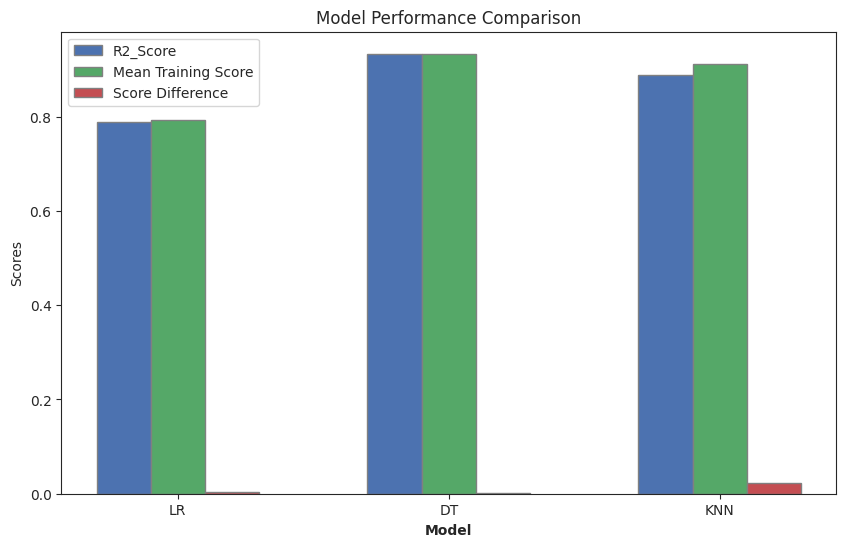

In [341]:
# Plotting a bar plot
plt.figure(figsize=(10, 6))

# Width of a bar
width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(scores_df['Model']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Make the plot
plt.bar(r1, scores_df['R2_Score'], color='b', width=width, edgecolor='grey', label='R2_Score')
plt.bar(r2, scores_df['Mean Training Score'], color='g', width=width, edgecolor='grey', label='Mean Training Score')
plt.bar(r3, scores_df['Score Difference'], color='r', width=width, edgecolor='grey', label='Score Difference')

# Add labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores')
plt.xticks([r + width for r in range(len(scores_df['Model']))], scores_df['Model'])

plt.title('Model Performance Comparison')
plt.legend()
plt.show()
